# Plot the animal path during all autopi task trials

In [1]:
%load_ext autoreload
%autoreload 2
import os
os.environ["DLClight"]="True" # if you don't need dlb gui
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os.path
import autopipy
import importlib
from autopipy.project import Project
from autopipy.session import Session
from spikeA.Session import Kilosort_session
from spikeA.Session import Tetrode_session
from spikeA.Animal_pose import Animal_pose
from spikeA.Intervals import Intervals
%matplotlib inline

In [2]:
projectName="autopi_ca1"
dataPath="/adata/projects/autopi_ca1"
dlcModelPath="/adata/models"
myProject = Project(name=projectName,dataPath=dataPath,dlcModelPath=dlcModelPath)
fn=myProject.dataPath+"/sessionList"
print("Reading " + fn)
sessionNames = pd.read_csv(fn) # this will be a pandas dataframe
print("We have {} testing sessions in the list".format(len(sessionNames)))
myProject.createSessionList(sessionNameList=sessionNames.sessionName.to_list()) 

Project name: autopi_ca1
dataPath: /adata/projects/autopi_ca1
dlcModelPath: /adata/models
Reading /adata/projects/autopi_ca1/sessionList
We have 29 testing sessions in the list


Alternatively, get a single session.

In [3]:
ses = Session(name="mn5623-14092021-0107",path="/adata/electro/mn5623/mn5623-14092021-0107",
             arenaTopVideo=True,homeBaseVideo=True, dataFileCheck=True)
sSes = Tetrode_session(name="mn5623-14092021-0107",path="/adata/electro/mn5623/mn5623-14092021-0107")

Select a session and segment the trials.

In [4]:
ses = myProject.sessionList[0]

In [5]:
ses.segmentTrialsFromLog(verbose=False)

Get some spikeA object to analyze the position

In [6]:
#sSes = Kilosort_session(ses.name,ses.path)
sSes = Tetrode_session(ses.name,ses.path)
ap = Animal_pose(sSes)
ap.load_pose_from_file()
print("percentage of valid datapoint: {:.4} %".format(ap.percentage_valid_data()))

Loading original pose from /adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/mn5824-20112020-0107.pose.npy
percentage of valid datapoint: 74.06 %


We can use the Interval class of spikeA to select position data for a trial.

In [15]:
leverPose = pd.read_csv(ses.path+"/leverPose")

In [33]:
trial=1
t = ses.trials[["startTime","endTime"]].to_numpy()[trial,:]
tLeverPose=leverPose[leverPose.time.between(t[0],t[1])]
tLeverPose.leverPressX.median()

-1.2137621652917512

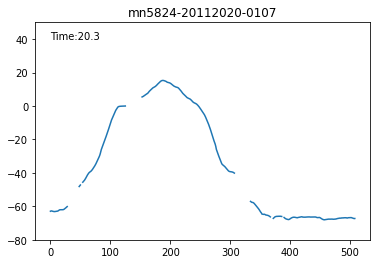

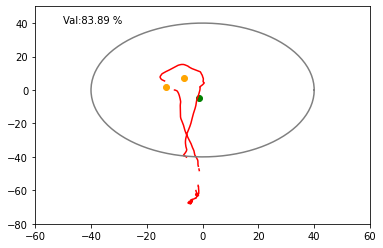

In [37]:

trial=1
t = ses.trials[["startTime","endTime"]].to_numpy()[trial,:]
tLeverPose=leverPose[leverPose.time.between(t[0],t[1])]

ap.set_intervals(ses.trials[["startTime","endTime"]].to_numpy()[(trial):trial+1,:],timeColumnIndex=7)
timeStr = "Time:{:.4}".format(ap.intervals.total_interval_duration_seconds())
validStr = "Val:{:.4} %".format(ap.percentage_valid_data())
plt.title(ses.name)
plt.plot(ap.pose[:,2])
plt.ylim(-80,50)
plt.text(x=0, y=40,s=timeStr)
plt.show()
    
    

pt=np.linspace(0,2*np.pi,200)
plt.plot(ap.pose[:,1],ap.pose[:,2],c="red")
plt.scatter(tLeverPose.leverPressX.median(),tLeverPose.leverPressY.median(),c="green")
plt.scatter(tLeverPose.leverBoxPLX.median(),tLeverPose.leverBoxPLY.median(),c="orange")
plt.scatter(tLeverPose.leverBoxPRX.median(),tLeverPose.leverBoxPRY.median(),c="orange")
plt.plot(np.cos(pt)*40,np.sin(pt)*40,c="gray")
plt.xlim(-60,60)
plt.ylim(-80,50)
plt.text(x=-50,y=40,s=validStr)
plt.show()

152 trials
row: 31 col: 10


/home/kevin/repo/spikeA/spikeA/Animal_pose.py:138: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(~np.isnan(self.pose[:,columnIndex]))/self.pose.shape[0]*100


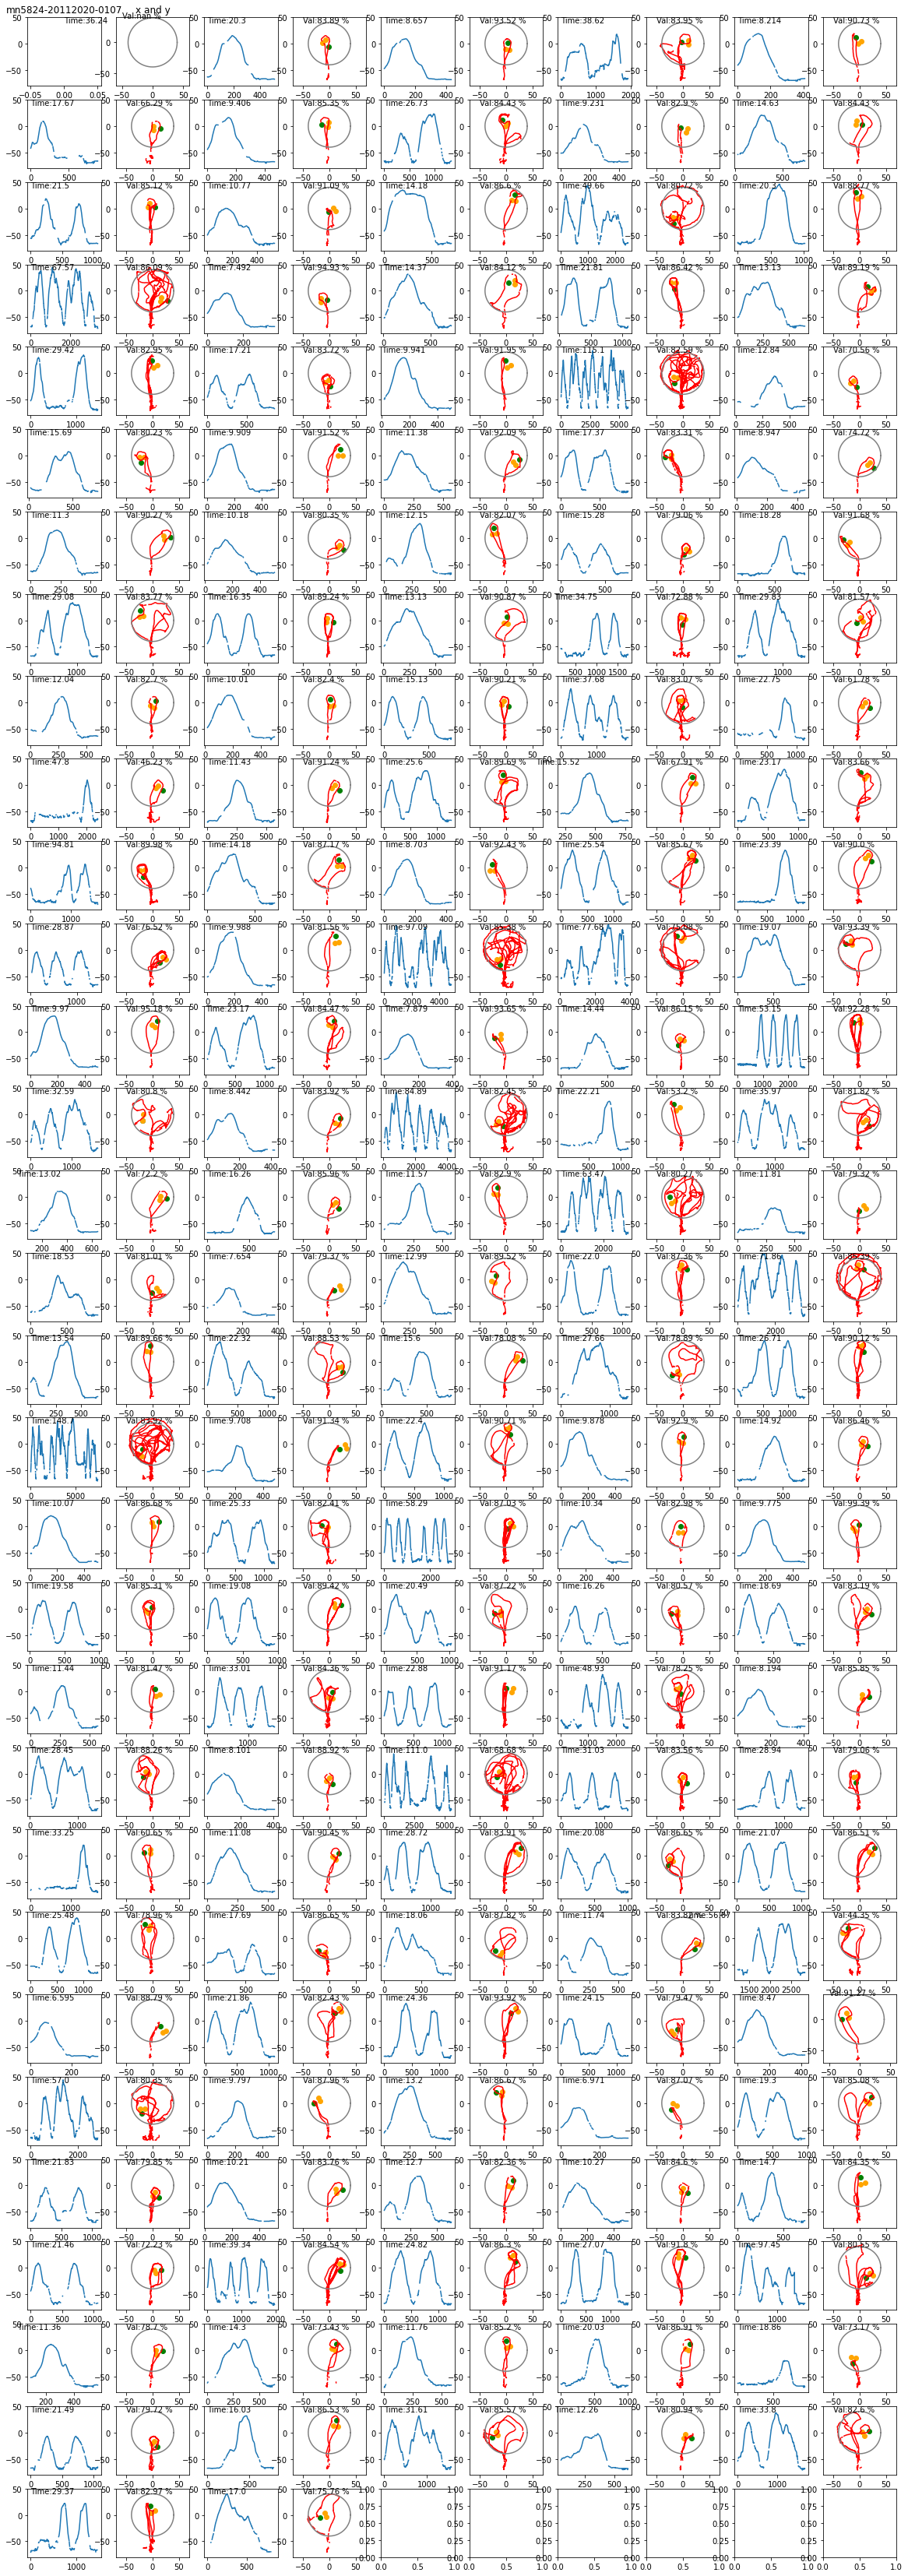

In [40]:
print("{} trials".format(len(ses.trials)))
ncol=10
nrow=int(len(ses.trials)/(ncol/2))+1
print("row:",nrow,"col:",ncol)

figure, axis = plt.subplots(nrow, ncol,figsize=(20,60))

for trial in range(len(ses.trials)):
    r=int(trial/(ncol/2))
    c=int(trial%(ncol/2))
    #print(trial,r,c)
    
    t = ses.trials[["startTime","endTime"]].to_numpy()[trial,:]
    tLeverPose=leverPose[leverPose.time.between(t[0],t[1])]

    
    ap.set_intervals(ses.trials[["startTime","endTime"]].to_numpy()[(trial):trial+1,:],timeColumnIndex=7)
    timeStr = "Time:{:.4}".format(ap.intervals.total_interval_duration_seconds())
    validStr = "Val:{:.4} %".format(ap.percentage_valid_data())
    if r==0 and c==0:
        axis[r,c*2].set_title(ses.name)
    axis[r,c*2].plot(ap.pose[:,2])
    axis[r,c*2].set_ylim(-80,50)
    axis[r,c*2].text(x=0, y=40,s=timeStr)
    
    if r==0 and c==0:
        axis[r,c*2+1].set_title("x and y")
    
    pt=np.linspace(0,2*np.pi,200)
    axis[r,c*2+1].plot(ap.pose[:,1],ap.pose[:,2],c="red")
    axis[r,c*2+1].plot(np.cos(pt)*40,np.sin(pt)*40,c="gray")
    axis[r,c*2+1].scatter(tLeverPose.leverPressX.median(),tLeverPose.leverPressY.median(),c="green")
    axis[r,c*2+1].scatter(tLeverPose.leverBoxPLX.median(),tLeverPose.leverBoxPLY.median(),c="orange")
    axis[r,c*2+1].scatter(tLeverPose.leverBoxPRX.median(),tLeverPose.leverBoxPRY.median(),c="orange")
    axis[r,c*2+1].axis('equal')
    axis[r,c*2+1].set_xlim(-60,60)
    axis[r,c*2+1].set_ylim(-80,50)
    axis[r,c*2+1].text(x=-50,y=40,s=validStr)

plt.savefig("/home/kevin/Documents/trial_examples2.pdf")